In [11]:
import pandas as pd
import statsmodels.api as sm
from scipy import stats

df = pd.read_pickle("results.pkl")
df["wsp/point"] = df["wsp_count_2.0"] / df["num_points"]
df

,num_points,opt_len,nn_len,untouched_len,nwsp5_2_len,nwsp7_len,nwsp9_len,nwsp5_len,wsp_count_2.0,wsp/point
name,,,,,,,,,,
berlin52,52,7544.365902,9194.130643,10818.833107,22846.619539,NaN,NaN,11728.735582,376,7.230769
bier127,127,NaN,139602.236419,173055.130034,314224.537324,NaN,NaN,NaN,1129,8.889764
brd14051,14051,NaN,575718.536949,837139.5488,NaN,NaN,NaN,NaN,<NA>,<NA>
ch130,130,6110.86095,7378.680775,10043.991903,20993.789501,NaN,NaN,17099.212197,1097,8.438462
ch150,150,6532.280933,7982.489176,10882.8634,29154.866635,NaN,NaN,29705.180285,1402,9.346667
...,...,...,...,...,...,...,...,...,...,...
uy734,734,NaN,100013.231237,141047.281549,NaN,NaN,NaN,NaN,8499,11.579019
wi29,29,NaN,36388.059232,33223.237172,NaN,NaN,NaN,NaN,97,3.344828
ym7663,7663,237978.589063,301008.545258,448968.393477,NaN,NaN,NaN,NaN,120650,15.744486


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:          wsp_count_2.0   R-squared (uncentered):                   0.951
Model:                            OLS   Adj. R-squared (uncentered):              0.951
Method:                 Least Squares   F-statistic:                              1616.
Date:                Sat, 30 Dec 2023   Prob (F-statistic):                    3.45e-56
Time:                        23:01:56   Log-Likelihood:                         -885.74
No. Observations:                  84   AIC:                                      1773.
Df Residuals:                      83   BIC:                                      1776.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
num_points    13.9863      0.348     40.202      0.000      13.294      14.678
==============================================================================
Omnibus:                      107.498   Durbin-Watson:                   2.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3066.486
Skew:                           3.860   Prob(JB):                         0.00
Kurtosis:                      31.575   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

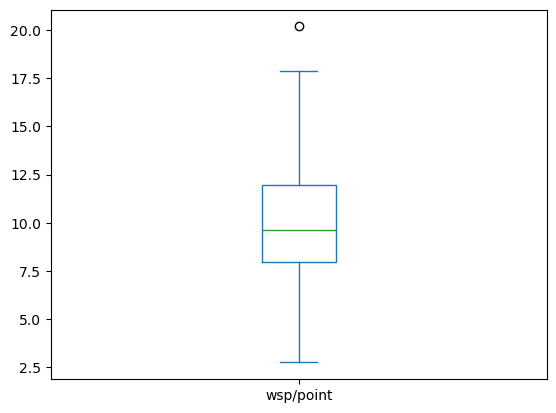

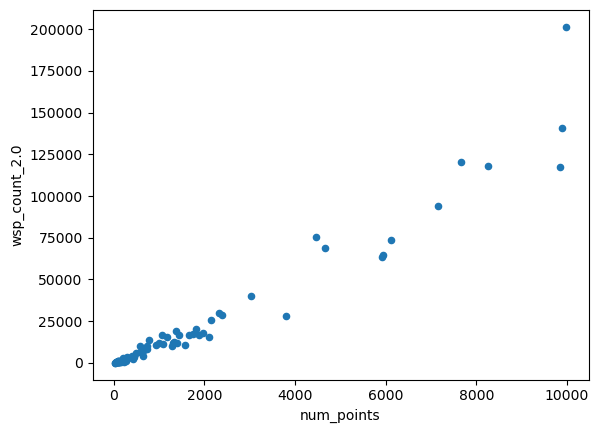

In [12]:
df = df[~df['wsp_count_2.0'].isna()] # Remove NAN wsp_counts
df["wsp/point"].plot.box()
df.plot.scatter("num_points", "wsp_count_2.0")
results = sm.OLS(df["wsp_count_2.0"].astype(float), df["num_points"].astype(float)).fit()
results.summary()

In [13]:
df = df[~df['opt_len'].isna()] # remove problems with unoptimal lens

In [15]:
df["nn error"] = df["nn_len"] / df["opt_len"]
print(len(df))
df

25


/var/folders/_t/4_m8pb3d3xs763zf2ztl10k40000gn/T/ipykernel_3485/2658495757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["nn error"] = df["nn_len"] / df["opt_len"]


,num_points,opt_len,nn_len,untouched_len,nwsp5_2_len,nwsp7_len,nwsp9_len,nwsp5_len,wsp_count_2.0,wsp/point,nn error
name,,,,,,,,,,,
berlin52,52,7544.365902,9194.130643,10818.833107,22846.619539,NaN,NaN,1.172874e+04,376,7.230769,1.218675
ch130,130,6110.86095,7378.680775,10043.991903,20993.789501,NaN,NaN,1.709921e+04,1097,8.438462,1.20747
ch150,150,6532.280933,7982.489176,10882.8634,29154.866635,NaN,NaN,2.970518e+04,1402,9.346667,1.222006
eil101,101,642.309536,862.68158,939.98217,1787.075871,NaN,NaN,1.296031e+03,1171,11.594059,1.343093
eil51,51,429.983312,590.674036,562.995183,800.237585,NaN,NaN,8.951434e+02,360,7.058824,1.373714
eil76,76,545.387552,707.751657,790.592842,822.832783,NaN,NaN,9.371500e+02,761,10.013158,1.297704
kroA100,100,21285.443182,27385.446195,39076.531975,60632.610851,NaN,NaN,4.550216e+04,792,7.92,1.286581
kroC100,100,20750.762504,28820.352399,38320.748276,59171.763282,NaN,NaN,6.335599e+04,728,7.28,1.388882
kroD100,100,21294.290821,27428.500507,40281.487011,58909.075462,NaN,NaN,8.670203e+04,930,9.3,1.288068


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               nn error   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.906
Method:                 Least Squares   F-statistic:                              242.6
Date:                Sat, 30 Dec 2023   Prob (F-statistic):                    4.77e-14
Time:                        23:10:24   Log-Likelihood:                         -11.387
No. Observations:                  25   AIC:                                      24.77
Df Residuals:                      24   BIC:                                      25.99
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
wsp/point      0.1083      0.007     15.575      0.000       0.094       0.123
==============================================================================
Omnibus:                        4.378   Durbin-Watson:                   1.010
Prob(Omnibus):                  0.112   Jarque-Bera (JB):                2.775
Skew:                          -0.781   Prob(JB):                        0.250
Kurtosis:                       3.471   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

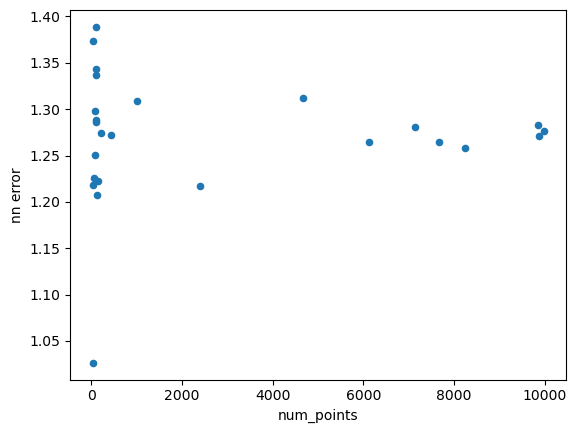

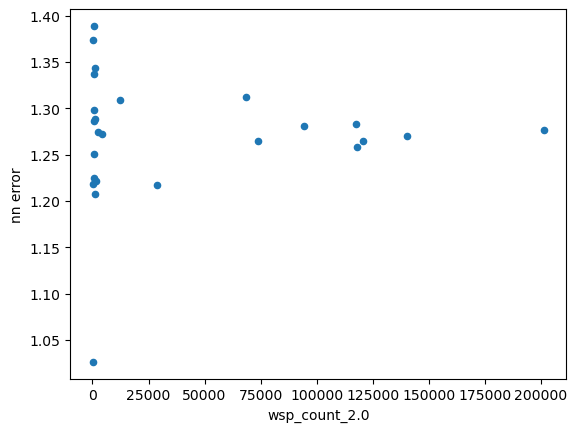

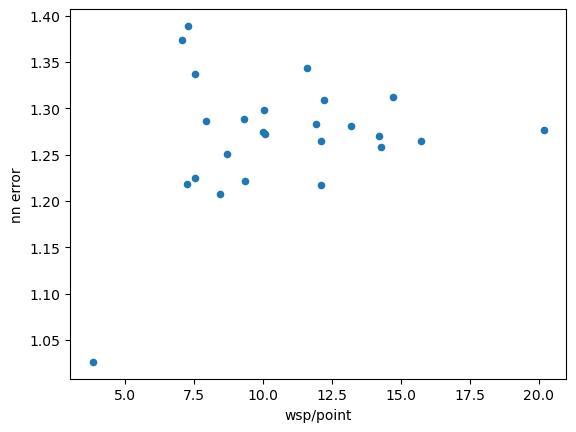

In [22]:
df.plot.scatter("num_points", "nn error")
df.plot.scatter("wsp_count_2.0", "nn error")
df.plot.scatter("wsp/point", "nn error")

results = sm.OLS(df["nn error"].astype(float), df["wsp/point"].astype(float)).fit()
results.summary()